In [1]:
import pandas as pd

In [2]:
# Import Driving Data

tables = pd.read_html('https://www.pgatour.com/stats/stat.101.2018.html')
drives = tables[1]
drives.head()

,RANK THIS WEEK,RANK LAST WEEK,PLAYER NAME,ROUNDS,AVG.,TOTAL DISTANCE,TOTAL DRIVES
0,1,1,Rory McIlroy,64,319.7,39000,122
1,2,2,Trey Mullinax,75,318.3,43929,138
2,3,3,Tom Lovelady,87,315.9,51168,162
3,4,4,Tony Finau,105,315.1,56721,180
4,5,5,Luke List,98,314.6,54746,174


In [3]:
drives['AVG.'].mean()

296.63626943005187

In [4]:
drives['AVG.'].std()

8.144855902778724

In [5]:
# Import PGA Rank Data

tables = pd.read_html('https://www.pgatour.com/stats/stat.127.2018.html')
ranks = tables[1]

ranks.head()

,RANK THIS WEEK,RANK LAST WEEK,PLAYER NAME,EVENTS,TOTAL
0,1,1,Dustin Johnson,20,206
1,2,2,Tommy Fleetwood,19,234
2,3,3,Justin Thomas,23,243
3,4,4,Rickie Fowler,20,264
4,5,5,Justin Rose,18,280


In [6]:
# (Optional) Rename Columns and Grab Needed Columns

drives = drives.rename(columns={'RANK THIS WEEK':'AVG DRIVER DISTANCE RANK', 'AVG.':'AVG DRIVE'})
drives = drives[['PLAYER NAME', 'AVG DRIVER DISTANCE RANK', 'AVG DRIVE']]

ranks = ranks.rename(columns={'RANK THIS WEEK':'PGA RANK'})
ranks = ranks[['PLAYER NAME', 'PGA RANK']]

In [7]:
drives.head()

,PLAYER NAME,AVG DRIVER DISTANCE RANK,AVG DRIVE
0,Rory McIlroy,1,319.7
1,Trey Mullinax,2,318.3
2,Tom Lovelady,3,315.9
3,Tony Finau,4,315.1
4,Luke List,5,314.6


In [8]:
ranks.head()

,PLAYER NAME,PGA RANK
0,Dustin Johnson,1
1,Tommy Fleetwood,2
2,Justin Thomas,3
3,Rickie Fowler,4
4,Justin Rose,5


In [9]:
df = pd.merge(ranks, drives, how='inner', on='PLAYER NAME', validate='one_to_one')

# Alternative Method to check if Key Columns are unique
# ranks['PLAYER NAME'].is_unique and drives['PLAYER NAME'].is_unique

In [10]:
df.head()

,PLAYER NAME,PGA RANK,AVG DRIVER DISTANCE RANK,AVG DRIVE
0,Dustin Johnson,1,6,314.0
1,Tommy Fleetwood,2,23,306.9
2,Justin Thomas,3,11,311.8
3,Rickie Fowler,4,T61,299.8
4,Justin Rose,5,T34,303.5


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 192
Data columns (total 4 columns):
PLAYER NAME                 193 non-null object
PGA RANK                    193 non-null object
AVG DRIVER DISTANCE RANK    193 non-null object
AVG DRIVE                   193 non-null float64
dtypes: float64(1), object(3)
memory usage: 7.5+ KB


In [12]:
# Convert Rank Columns to Integers

df[['PGA RANK', 'AVG DRIVER DISTANCE RANK']] = df[['PGA RANK', 'AVG DRIVER DISTANCE RANK']] \
                                                .applymap(lambda x: int(x.replace('T',"")))

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 192
Data columns (total 4 columns):
PLAYER NAME                 193 non-null object
PGA RANK                    193 non-null int64
AVG DRIVER DISTANCE RANK    193 non-null int64
AVG DRIVE                   193 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 7.5+ KB


In [14]:
# Average Driving Distance for Top 25 Drivers
df.sort_values(by='AVG DRIVER DISTANCE RANK').loc[:25, 'AVG DRIVE'].mean()

306.2016949152542

In [15]:
# Average Driving Distance for Top 25 PGA Players
df.sort_values(by='PGA RANK').loc[:25, 'AVG DRIVE'].mean()

303.4384615384616

In [16]:
# Count of Top 25 Players in Top 25 Driving Rank
sum(df.sort_values(by='PGA RANK').loc[:25, 'AVG DRIVER DISTANCE RANK'] <= 25)

9

In [17]:
# Average Driving Rank
df.sort_values(by='PGA RANK').loc[:25, 'AVG DRIVER DISTANCE RANK'].mean()

50.5

In [18]:
# Create a List of Years
pd.date_range(start='1/1/1980', end=pd.to_datetime('today') + 
              pd.offsets.DateOffset(month=12, day=31), freq='Y').year

Int64Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
            1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
            2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
            2013, 2014, 2015, 2016, 2017, 2018, 2019],
           dtype='int64')

In [19]:
# Create a List of Years
years = pd.date_range(start='1/1/1980', end=pd.to_datetime('today') +
                      pd.offsets.DateOffset(month=12, day=31), freq='Y').year

# Top 25
for year in years:
    print(f'https://www.pgatour.com/stats/stat.101.{year}.html')

https://www.pgatour.com/stats/stat.101.1980.html
https://www.pgatour.com/stats/stat.101.1981.html
https://www.pgatour.com/stats/stat.101.1982.html
https://www.pgatour.com/stats/stat.101.1983.html
https://www.pgatour.com/stats/stat.101.1984.html
https://www.pgatour.com/stats/stat.101.1985.html
https://www.pgatour.com/stats/stat.101.1986.html
https://www.pgatour.com/stats/stat.101.1987.html
https://www.pgatour.com/stats/stat.101.1988.html
https://www.pgatour.com/stats/stat.101.1989.html
https://www.pgatour.com/stats/stat.101.1990.html
https://www.pgatour.com/stats/stat.101.1991.html
https://www.pgatour.com/stats/stat.101.1992.html
https://www.pgatour.com/stats/stat.101.1993.html
https://www.pgatour.com/stats/stat.101.1994.html
https://www.pgatour.com/stats/stat.101.1995.html
https://www.pgatour.com/stats/stat.101.1996.html
https://www.pgatour.com/stats/stat.101.1997.html
https://www.pgatour.com/stats/stat.101.1998.html
https://www.pgatour.com/stats/stat.101.1999.html
https://www.pgatour.

In [20]:
# Loop Through URL's and create a Dataframe

d = []

for year in years:
    tables = pd.read_html(f'https://www.pgatour.com/stats/stat.101.{year}.html')
    drives = tables[1].loc[:25]
    
    d.append({'Year': year, 'Average Drive': drives['AVG.'].mean()})

dot_df = pd.DataFrame(d)

In [21]:
dot_df.head()

,Average Drive,Year
0,268.400000,1980
1,269.957692,1981
2,267.707692,1982
3,269.853846,1983
4,271.223077,1984


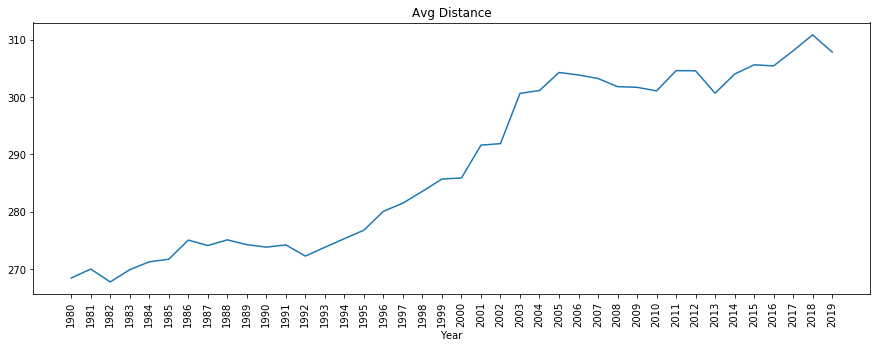

In [22]:
%matplotlib inline

dot_df.set_index('Year')['Average Drive'].plot(figsize=(15,5), xticks=(years), 
                                               rot='vertical', title='Avg Distance');

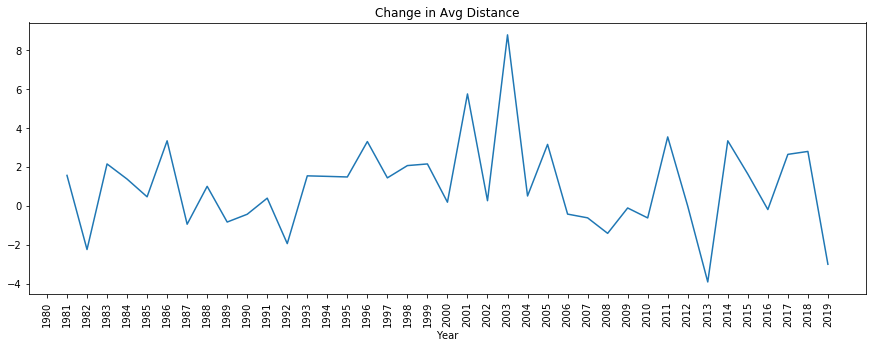

In [23]:
dot_df.set_index('Year')['Average Drive'].diff().plot(figsize=(15,5), xticks=(years), 
                                                      rot='vertical', title='Change in Avg Distance');